In [38]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models 

In [39]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()



In [30]:
X_train.shape


(50000, 32, 32, 3)

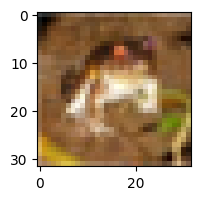

In [43]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[0])

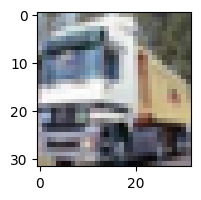

In [45]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[1])

In [46]:
X_test.shape

(10000, 32, 32, 3)

In [47]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [48]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [49]:
y_test = y_test.reshape(-1,)

In [50]:
label = ["airplane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

In [53]:
def plot_pic(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

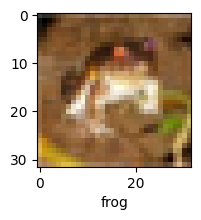

In [54]:
plot_pic(X_train, y_train, 0)

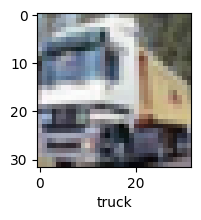

In [55]:
plot_pic(X_train, y_train,1)

In [56]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [57]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 643s 361ms/step - loss: 1.8123 - accuracy: 0.3589
Epoch 2/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.6246 - accuracy: 0.4254
Epoch 3/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.5404 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4822 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.4308 - accuracy: 0.4958


In [58]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.33      0.45      1000
           1       0.65      0.54      0.59      1000
           2       0.40      0.29      0.34      1000
           3       0.37      0.28      0.32      1000
           4       0.41      0.45      0.43      1000
           5       0.53      0.24      0.33      1000
           6       0.47      0.64      0.54      1000
           7       0.51      0.60      0.55      1000
           8       0.46      0.78      0.58      1000
           9       0.45      0.65      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [59]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [60]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 98s 43ms/step - loss: 1.4623 - accuracy: 0.4759
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1175 - accuracy: 0.6059
Epoch 3/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.9850 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8993 - accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8298 - accuracy: 0.7117
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7761 - accuracy: 0.7287
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7231 - accuracy: 0.7484
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6779 - accuracy: 0.7654
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6412 - accuracy: 0.7768
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [63]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 44s 16ms/step - loss: 0.9148 - accuracy: 0.7015


[0.9148383736610413, 0.7014999985694885]

In [64]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 16ms/step


array([[2.2053205e-04, 8.8061142e-07, 1.9474232e-03, 8.7022012e-01,
        1.2567138e-03, 1.1497120e-01, 1.8147090e-03, 4.4845314e-05,
        9.5139295e-03, 9.6721633e-06],
       [1.2065951e-03, 1.6141078e-02, 2.0774798e-05, 1.3938890e-06,
        3.7596740e-07, 2.7250939e-08, 1.1278774e-07, 3.3762846e-09,
        9.8150289e-01, 1.1268057e-03],
       [3.2188509e-02, 6.3026345e-01, 1.5518975e-03, 2.5321748e-03,
        4.9113482e-04, 2.3377831e-04, 2.2027449e-04, 1.9970639e-03,
        2.1095197e-01, 1.1956967e-01],
       [7.5426745e-01, 1.8602510e-01, 1.9934301e-03, 1.9858858e-02,
        4.2169695e-03, 1.4586367e-04, 4.0531292e-04, 3.1538103e-03,
        2.3721756e-02, 6.2114233e-03],
       [1.6487406e-09, 1.0350868e-05, 5.2763633e-03, 6.2181342e-02,
        6.4523309e-01, 3.4597579e-03, 2.8383380e-01, 4.3697410e-06,
        4.4288313e-07, 4.4704640e-07]], dtype=float32)

In [65]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [66]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

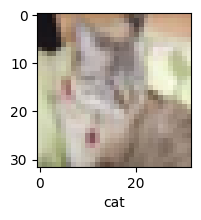

In [71]:
plot_sample(X_test, y_test,8)

In [72]:
classes[y_classes[8]]

'cat'